#02-Assignment-Statistics-Advance-01

#Question 01. Explain the properties of the F-distribution.

#Answer:

**Understanding the F-Distribution in Statistics**

The F-distribution is a critical concept in statistics, frequently used in ANOVA (Analysis of Variance), regression analysis, and various hypothesis tests. It is essential when comparing the variances between two groups to determine if they are significantly different.

**Key Characteristics of the F-Distribution**

**1.	Always Non-Negative:**

The F-distribution is defined as a ratio of two sample variances, which are non-negative by nature, so it only takes on positive values.

**2.	Right-Skewed:**

It has a positive skew, meaning its distribution curve leans to the right. However, as the degrees of freedom increase, the distribution becomes less skewed and gradually resembles a normal distribution.

**3.	Dependent on Degrees of Freedom:**

The shape of the distribution is determined by two parameters: the numerator degrees of freedom (d1d_1d1) and the denominator degrees of freedom (d2d_2d2). Higher values for d1d_1d1 and d2d_2d2 result in a distribution that is closer to a normal curve.

**4.	Mean of the Distribution:**

The mean of an F-distribution is calculated as:
Mean=d2/d2-2,  d2>2

Note that if d2≤2, the mean does not exist.


**5.	Variance of the Distribution:**
The variance formula is:

Variance=2d22(d1+d2-2)d1(d2-2)2(d2-4),d2>4

The variance becomes undefined when d2≤4

**6.	Right-Tail Test:**

The F-distribution is commonly applied in right-tailed tests, such as when comparing whether one group's variance is significantly higher than another's.

**7.	Widely Used in Hypothesis Testing:**

It plays a significant role in tests like ANOVA and regression analysis, where it's used to test hypotheses about the equality of multiple group means or the overall significance of regression models.

**Python Example: Visualizing the F-Distribution**

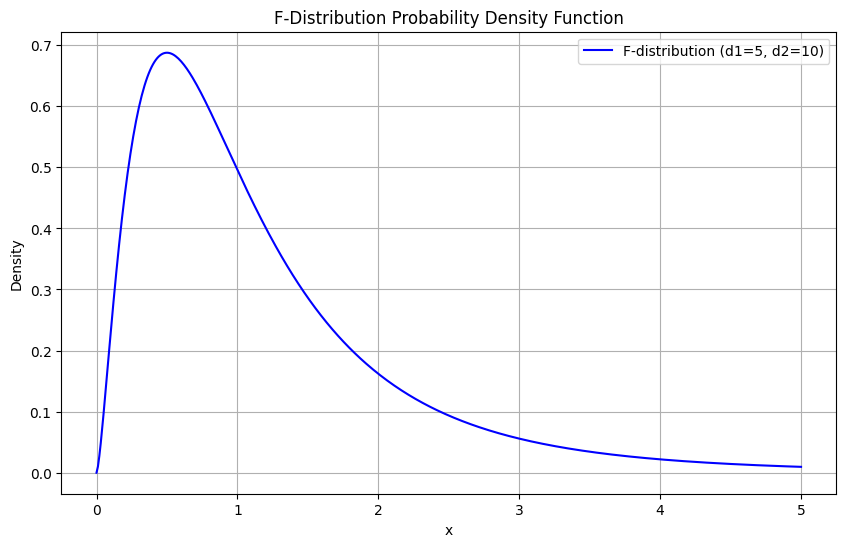

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Set degrees of freedom for numerator and denominator
d1 = 5
d2 = 10

# Generate x values
x = np.linspace(0, 5, 500)

# Calculate the PDF values
pdf_values = f.pdf(x, d1, d2)

# Plot the F-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label=f'F-distribution (d1={d1}, d2={d2})', color='blue')
plt.title('F-Distribution Probability Density Function')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


**Explanation of the Code**

1.	Libraries: We import essential libraries such as numpy, matplotlib, and scipy.stats.f.
2.	Parameters: Define the numerator (d1d_1d1) and denominator (d2d_2d2) degrees of freedom.
3.	Data Generation: Create a range of x-values for plotting.
4.	PDF Calculation: Use the f.pdf() function from the scipy.stats module to compute the PDF.
5.	Visualization: The matplotlib library is used to plot the probability density function.

**Interpretation of the Plot**

The output shows an F-distribution curve with specified degrees of freedom. The plot is skewed to the right, which is typical of the F-distribution, especially with lower degrees of freedom.

**Real-World Applications of the F-Distribution**

**1.	ANOVA:** Used to determine if there are statistically significant differences among group means.

**2.	Regression Analysis:** Helps assess the overall significance of a regression model by comparing the explained variance to the unexplained variance.

**3.	Hypothesis Testing:** Tests whether the variances of two populations are equal, which is useful in areas such as quality control or comparing performance metrics.

The F-distribution is an essential tool in statistics, helping to draw meaningful conclusions about population variances and the significance of models in regression analysis.


#Question 02. In which types of statistical tests is the F-distribution used, and why is it appropriate for these tests?

#Answer:

The F-distribution is crucial in various statistical tests, especially when comparing variances or evaluating models. It is commonly used in tests like ANOVA (Analysis of Variance), regression analysis, and variance equality tests.

Let's break down where the F-distribution is applied, why it's suitable, and how you can use Python to perform these tests.

**1. Analysis of Variance (ANOVA)**

•	Objective: To check if the means of three or more groups differ significantly.

•	Reason for using F-distribution: ANOVA assesses whether the variability between group means (differences among group averages) is significantly larger than the variability within groups (differences within each group). The ratio of these two variances is modeled using the F-distribution.


In [2]:
import scipy.stats as stats
import numpy as np

# Sample data for three groups
group1 = np.random.normal(25, 5, 30)
group2 = np.random.normal(30, 5, 30)
group3 = np.random.normal(35, 5, 30)

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat}, p-value: {p_value}")


F-statistic: 24.108229364938648, p-value: 4.669837060753214e-09


**2. Regression Analysis**

•	Objective:
To determine if a significant relationship exists between predictor variables and a response variable.

•	Reason for using F-distribution:
The F-test in regression measures the ratio of explained variance (by the model) to unexplained variance (residuals). This ratio determines if the overall model is statistically significant.


In [3]:
import statsmodels.api as sm
import numpy as np

# Generating random data for regression analysis
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 0.5

# Adding a constant for the intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Summary includes F-test results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     289.3
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           5.29e-31
Time:                        08:51:25   Log-Likelihood:                -72.200
No. Observations:                 100   AIC:                             148.4
Df Residuals:                      98   BIC:                             153.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1111      0.097      1.149      0.2

**3. Testing for Equality of Variances (Levene’s Test, Bartlett’s Test)**

•	Objective:
To assess if different samples come from populations with equal variances.

•	Reason for using F-distribution:
The F-distribution is used to evaluate the variance ratio between samples. For Bartlett’s test, the computed statistic can be transformed to follow an F-distribution.


In [4]:
import scipy.stats as stats
import numpy as np

# Generating two samples with different variances
sample1 = np.random.normal(20, 5, 50)
sample2 = np.random.normal(20, 10, 50)

# Performing Levene's test for equality of variances
stat, p_value = stats.levene(sample1, sample2)
print(f"Levene's test statistic: {stat}, p-value: {p_value}")


Levene's test statistic: 19.8163103562266, p-value: 2.2593120328171843e-05


**Why the F-distribution Fits These Tests**

The F-distribution is ideal for these tests because:

•	It measures the ratio of two variances. In tests like ANOVA or regression, the goal is to determine if the variance between groups or models is significantly different than expected by random chance.

•	The distribution shape depends on two parameters: degrees of freedom for both the numerator and the denominator, making it suitable for variance comparisons with varying sample sizes.

•	The F-distribution is right-skewed, making it ideal for ratio tests since variances are non-negative.

**Characteristics of the F-distribution**

**•	Non-negative:** Since it represents variance ratios, it only takes positive values.

**•	Right-skewed:** The skew decreases as sample sizes increase, approaching a normal distribution.

**•	Degrees of freedom:**
Defined by two parameters, F(d1,d2)F(d_1, d_2)F(d1,d2), where d1d_1d1 represents between-group variance, and d2d_2d2 represents within-group variance.

These properties make the F-distribution highly suitable for statistical analyses that compare variances or assess model significance.


#Question 03. What are the key assumptions required for conducting an F-test to compare the variances of two populations?

#Answer:

To conduct an F-test for comparing the variances of two populations, certain assumptions must be satisfied to ensure the accuracy and reliability of the test results. Here’s a summary of these essential assumptions and how to perform an F-test using Python.

**Assumptions of the F-test**

**1.	Independence of Samples:**

The two samples being tested should be independent, meaning the selection of one sample does not affect the selection of the other.

**2.	Normal Distribution:**

The populations from which the samples are drawn must follow a normal distribution. The F-test is quite sensitive to deviations from normality, especially with smaller sample sizes.

**3.	Random Sampling:**

The data should be obtained through random sampling to ensure that the samples accurately represent the underlying populations.

**4.	Non-negative Variances:**

Since variances cannot be negative, the test assumes that all variance values are positive.

**5.	Equal Within-group Variances (in the case of ANOVA):**

When the F-test is used in an Analysis of Variance (ANOVA) context, it is assumed that the variances within groups are approximately equal. However, for comparing just two samples, this assumption doesn't apply.


**Performing an F-test in Python**

Python’s SciPy library provides tools to conduct F-tests. If you’re interested in directly comparing variances between two independent samples, you can compute the F-statistic manually, or use tools like Levene’s test for a more robust alternative when the normality assumption may not hold.

Below is a Python example that demonstrates how to compare the variances of two independent samples using an F-test:


In [5]:
import numpy as np
import scipy.stats as stats

# Set a random seed for reproducibility
np.random.seed(42)

# Generate two independent samples with different variances
sample1 = np.random.normal(loc=10, scale=3, size=50)  # Mean=10, Std Dev=3
sample2 = np.random.normal(loc=10, scale=5, size=50)  # Mean=10, Std Dev=5

# Calculate sample variances
variance1 = np.var(sample1, ddof=1)
variance2 = np.var(sample2, ddof=1)

# Compute the F-statistic
F_statistic = variance1 / variance2

# Determine degrees of freedom for each sample
df1 = len(sample1) - 1
df2 = len(sample2) - 1

# Calculate the p-value using the F-distribution cumulative distribution function (CDF)
p_value = 1 - stats.f.cdf(F_statistic, df1, df2)

# Output results
print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the results with a significance level (alpha) of 0.05
alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected: The variances are significantly different.")
else:
    print("The null hypothesis is not rejected: The variances are not significantly different.")


F-statistic: 0.4105
p-value: 0.9989
The null hypothesis is not rejected: The variances are not significantly different.


**Explanation of the Code:**

1.	Sample Generation: Two sets of data are generated from normal distributions with different standard deviations to simulate samples with unequal variances.

2.	Variance Calculation: The variances of both samples are calculated using np.var() with ddof=1 to use the unbiased estimator.

3.	F-statistic Computation: The F-statistic is derived as the ratio of the two sample variances.

4.	Degrees of Freedom: The degrees of freedom for each sample are computed based on the sample size.

5.	p-value Calculation: The cumulative distribution function (stats.f.cdf) is used to determine the p-value associated with the computed F-statistic.

6.	Result Interpretation: If the p-value is less than the chosen significance level (α = 0.05), the null hypothesis (i.e., that the two variances are equal) is rejected.

**Important Considerations**

•	Robust Alternatives: If the normality assumption is questionable, consider using Levene’s test or the Brown-Forsythe test, which are less sensitive to deviations from normality.

•	F-test Limitations: The F-test can be highly sensitive to non-normal distributions, so it's generally recommended to confirm the assumption of normality before relying on its results.

This example provides a straightforward method to compare variances in Python, making it useful in cases where normality and independence assumptions are reasonably satisfied.


#Question 04. What is the purpose of ANOVA, and how does it differ from a t-test?

#Answer:

**Understanding the Purpose of ANOVA**

ANOVA (Analysis of Variance) is a statistical technique used to compare the means of three or more groups. Its primary purpose is to determine whether there are any statistically significant differences among the means of these groups. By analyzing the variances within and between groups, ANOVA helps to ascertain if observed differences in sample means are likely due to actual differences in population means or merely by chance.

**Differences Between ANOVA and t-Test**

The t-Test is another statistical method, but it is typically used to compare the means of only two groups. Here are the key distinctions between ANOVA and t-Test:

**1.	Number of Groups:**

t-Test: Compares two groups.

ANOVA: Compares three or more groups.

**2.	Variance Analysis:**

t-Test: Directly compares the means of two groups.

ANOVA: Analyzes the variances within and between multiple groups to understand the means.

**3.	Multiple Comparisons:**

t-Test: Performing multiple t-tests increases the risk of Type I error (false positives).

ANOVA: Controls for Type I error across multiple comparisons by using a single overall test.

**4.	Post-hoc Testing:**

t-Test: Does not typically require post-hoc tests.

ANOVA: If significant differences are found, post-hoc tests (like Tukey's HSD) are used to identify which groups differ.


**Example Using Python**

Here's how to perform both ANOVA and a t-test using Python:


In [6]:
#ANOVA Example

import pandas as pd
import scipy.stats as stats

# Example data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 25, 27, 24]
}
df = pd.DataFrame(data)

# Perform ANOVA
anova_result = stats.f_oneway(df[df['Group'] == 'A']['Value'],
                              df[df['Group'] == 'B']['Value'],
                              df[df['Group'] == 'C']['Value'])

print("ANOVA result:", anova_result)


ANOVA result: F_onewayResult(statistic=24.03030303030303, pvalue=0.0013671338001745245)


In [8]:
# t-Test Example

# Example data
group1 = [23, 20, 22]
group2 = [30, 35, 32]

# Perform independent t-test
t_test_result = stats.ttest_ind(group1, group2)

print("t-test result:", t_test_result)


t-test result: TtestResult(statistic=-6.275716324421889, pvalue=0.0032911002454069234, df=4.0)


**•	ANOVA Result:**

The output includes an F-value and a p-value. If the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis, indicating that at least one group mean is different.

**•	t-Test Result:**

The output provides a t-value and a p-value. A p-value below the significance level (e.g., 0.05) suggests that there is a significant difference between the two group means.


**Conclusion:**

ANOVA is used for comparing the means across three or more groups, while a t-test is suitable for comparing the means between two groups. ANOVA helps control the Type I error rate in multiple comparisons, a task not handled by multiple t-tests.

#Question 05. Explain when and why you would use a one-way ANOVA instead of multiple t-tests when comparing more than two groups.

#Answer:

**Understanding When to Use One-Way ANOVA Instead of Multiple t-Tests**

One-way ANOVA (Analysis of Variance) is a statistical method used for comparing the means of three or more independent groups to determine if there are any statistically significant differences among them. Here’s an explanation of when and why to use one-way ANOVA over multiple t-tests:

**When to Use One-Way ANOVA**

**1.	Comparing Three or More Groups:**
One-way ANOVA is appropriate when you need to compare the means of three or more groups.

**2.	Independent Samples:**
The method is used when the samples from each group are independent of one another.

**3.	Assumptions of ANOVA:**

o	Normal Distribution: Data in each group should be approximately normally distributed.

o	Homogeneity of Variances: The variances among the groups should be roughly equal.

o	Independence: Observations should be independent.

**Why Use One-Way ANOVA Instead of Multiple t-Tests**

1.	Control for Type I Error: Conducting multiple t-tests increases the risk of Type I errors (false positives). One-way ANOVA controls the overall Type I error rate by using a single test to compare all groups.

2.	Efficiency: ANOVA is more efficient when dealing with multiple groups, as it evaluates all comparisons simultaneously.

3.	Comprehensive Analysis: ANOVA provides a more comprehensive analysis by determining if there are any significant differences among the group means as a whole.


In [9]:
#Here’s how to perform a one-way ANOVA using Python:

import pandas as pd
import scipy.stats as stats

# Sample data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 25, 27, 24]
}
df = pd.DataFrame(data)

# Perform one-way ANOVA
anova_result = stats.f_oneway(df[df['Group'] == 'A']['Value'],
                              df[df['Group'] == 'B']['Value'],
                              df[df['Group'] == 'C']['Value'])

print("ANOVA result:", anova_result)


ANOVA result: F_onewayResult(statistic=24.03030303030303, pvalue=0.0013671338001745245)


**Interpretation**

**•	ANOVA Result:** The output includes an F-value and a p-value. If the p-value is below a chosen significance level (e.g., 0.05), the null hypothesis is rejected, indicating at least one group mean is significantly different.

Using one-way ANOVA helps to efficiently and accurately determine if there are significant differences among multiple groups while controlling for Type I errors, making it a preferred method over multiple t-tests for comparing more than two groups.


#Question 06. Explain how variance is partitioned in ANOVA into between-group variance and within-group variance.How does this partitioning contribute to the calculation of the F-statistic?

#Answer:

**Understanding the Partitioning of Variance in ANOVA**

ANOVA (Analysis of Variance) breaks down the total variance observed in the data into two parts: between-group variance and within-group variance. This partitioning is essential for calculating the F-statistic, which helps determine if the differences among group means are statistically significant.

**Total Variance:**
Total variance measures the overall variability in the data. It's the sum of the squared differences between each observation and the overall mean.

Total Variance=∑i=1n(Xi−X‾)2\text{Total Variance} = \sum_{i=1}^{n} (X_i - \overline{X})^2

Where XiX_i represents individual data points, and X‾\overline{X} is the overall mean.

**Between-Group Variance:**
This variance captures the variability due to differences between the group means and the overall mean. It reflects how much each group mean deviates from the overall mean.

Between-Group Variance=∑j=1knj(X‾j−X‾)2\text{Between-Group Variance} = \sum_{j=1}^{k} n_j (\overline{X}_j - \overline{X})^2

Here, X‾j\overline{X}_j is the mean of group jj, njn_j is the number of observations in group jj, and kk is the number of groups.

**Within-Group Variance:**
This variance measures the variability within each group. It reflects how much individual observations within each group deviate from their respective group means.

Within-Group Variance=∑j=1k∑i=1nj(Xij−X‾j)2\text{Within-Group Variance} = \sum_{j=1}^{k} \sum_{i=1}^{n_j} (X_{ij} - \overline{X}_j)^2

Where XijX_{ij} are the individual data points in group jj, and X‾j\overline{X}_j is the mean of group jj.

**Calculating the F-Statistic:**
The F-statistic is the ratio of between-group variance to within-group variance. It is used to test the null hypothesis that the group means are equal.

F=Between-Group VarianceWithin-Group VarianceF = \frac{\text{Between-Group Variance}}{\text{Within-Group Variance}}

More specifically, it can be expressed as:

**F=MSBMSWF = \frac{MSB}{MSW}**

Where:

•	MSB (Mean Square Between): Between-group variance divided by the degrees of freedom between groups (k−1k - 1).

•	MSW (Mean Square Within): Within-group variance divided by the degrees of freedom within groups (n−kn - k).




In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Sample data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 25, 27, 24]
}
df = pd.DataFrame(data)

# Calculate group means and overall mean
group_means = df.groupby('Group').mean()
overall_mean = df['Value'].mean()

# Calculate between-group variance (SSB)
ssb = sum(df.groupby('Group').size() * (group_means['Value'] - overall_mean)**2)

# Calculate within-group variance (SSW)
ssw = sum((df['Value'] - df.groupby('Group')['Value'].transform('mean'))**2)

# Degrees of freedom
df_between = len(group_means) - 1
df_within = len(df) - len(group_means)

# Mean squares
ms_between = ssb / df_between
ms_within = ssw / df_within

# Calculate F-statistic
f_statistic = ms_between / ms_within

print(f"SSB (Between-Group Sum of Squares): {ssb}")
print(f"SSW (Within-Group Sum of Squares): {ssw}")
print(f"MSB (Mean Square Between): {ms_between}")
print(f"MSW (Mean Square Within): {ms_within}")
print(f"F-statistic: {f_statistic}")

# Validate with scipy.stats
anova_result = stats.f_oneway(df[df['Group'] == 'A']['Value'],
                              df[df['Group'] == 'B']['Value'],
                              df[df['Group'] == 'C']['Value'])
print(f"Scipy F-statistic: {anova_result.statistic}")


SSB (Between-Group Sum of Squares): 176.22222222222226
SSW (Within-Group Sum of Squares): 22.000000000000004
MSB (Mean Square Between): 88.11111111111113
MSW (Mean Square Within): 3.6666666666666674
F-statistic: 24.03030303030303
Scipy F-statistic: 24.03030303030303


**Interpretation:**

•	SSB (Sum of Squares Between): Measures the variability due to differences among group means.

•	SSW (Sum of Squares Within): Measures the variability within each group.

•	MSB (Mean Square Between): Calculated by dividing SSB by the degrees of freedom between groups.

•	MSW (Mean Square Within): Calculated by dividing SSW by the degrees of freedom within groups.

•	F-Statistic: This ratio of MSB to MSW helps determine if there are significant differences among the group means.

The F-statistic plays a crucial role in ANOVA by comparing the variances to test if group means differ significantly.


#Question 07. Compare the classical (frequentist) approach to ANOVA with the Bayesian approach. What are the key differences in terms of how they handle uncertainty, parameter estimation, and hypothesis testing?

#Answer:

**Comparing Classical (Frequentist) and Bayesian Approaches to ANOVA**

Classical (Frequentist) ANOVA and Bayesian ANOVA are two distinct methodologies used for statistical analysis. Each approach has its own way of handling uncertainty, parameter estimation, and hypothesis testing. Here’s a comparison of the two:

**Handling Uncertainty:**

**•	Frequentist Approach:** Uncertainty is expressed through confidence intervals and p-values. The frequentist method relies on long-run frequencies and does not incorporate prior beliefs about parameters.

**•	Bayesian Approach:** Uncertainty is expressed through probability distributions. Bayesian methods combine prior distributions with data to form posterior distributions, giving a comprehensive view of parameter uncertainty.

**Parameter Estimation:**

**•	Frequentist Approach:** Parameters are estimated as fixed but unknown quantities. Estimations are done using point estimates like sample means and variances. This approach does not use prior information.

**•	Bayesian Approach:** Parameters are treated as random variables with distributions. Bayesian estimation updates prior beliefs with observed data to obtain posterior distributions, providing a probabilistic framework for parameter estimation.

**Hypothesis Testing:**

**•	Frequentist Approach:** Hypothesis testing involves p-values and F-statistics. The null hypothesis states that all group means are equal, and a significant p-value indicates rejection of this hypothesis.

**•	Bayesian Approach:** Hypothesis testing involves calculating Bayes factors or examining posterior probabilities. This approach allows for direct probability statements about hypotheses, providing more intuitive results compared to p-values.


In [11]:
#Frequentist ANOVA

import pandas as pd
import scipy.stats as stats

# Example data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 25, 27, 24]
}
df = pd.DataFrame(data)

# Perform one-way ANOVA
anova_result = stats.f_oneway(df[df['Group'] == 'A']['Value'],
                              df[df['Group'] == 'B']['Value'],
                              df[df['Group'] == 'C']['Value'])

print("Frequentist ANOVA result:", anova_result)



Frequentist ANOVA result: F_onewayResult(statistic=24.03030303030303, pvalue=0.0013671338001745245)


In [15]:
import pymc as pm
import arviz as az
import pandas as pd

# Example data
data = {
    'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Value': [23, 20, 22, 30, 35, 32, 25, 27, 24]
}
df = pd.DataFrame(data)

# Encoding categorical groups
df['Group_Code'] = df['Group'].astype('category').cat.codes

# Bayesian ANOVA model
with pm.Model() as model:
    # Priors for group means (one for each group)
    mu = pm.Normal('mu', mu=0, sigma=10, shape=3)

    # Prior for standard deviation (sigma)
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood (data-generating process)
    likelihood = pm.Normal('likelihood', mu=mu[df['Group_Code']], sigma=sigma, observed=df['Value'])

    # Inference
    trace = pm.sample(2000, return_inferencedata=True)

# Posterior summary
az.summary(trace)


Output()

Output()

ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[0],20.946,2.103,17.179,24.197,0.070,0.050,1666.0,831.0,1.0
mu[1],31.371,2.216,27.852,34.811,0.076,0.054,1555.0,837.0,1.0
mu[2],24.651,2.028,20.809,27.582,0.062,0.044,1993.0,1074.0,1.0
sigma,2.730,1.592,1.027,4.937,0.066,0.046,859.0,794.0,1.0


**Interpretation:**

•	Frequentist ANOVA Result: Yields an F-statistic and a p-value to determine if the null hypothesis of equal group means can be rejected.

•	Bayesian ANOVA Result: Provides posterior distributions for group means and other parameters. The summary includes credible intervals representing the range of parameter values with a specified probability.

**Conclusion:**

Both classical and Bayesian approaches to ANOVA provide useful tools for comparing group means. The frequentist approach focuses on point estimates and p-values, while the Bayesian approach provides a probabilistic framework that incorporates prior information and gives a complete picture of parameter uncertainty.


#Question 08.	Question: You have two sets of data representing the incomes of two different professions:

Profession A: [48, 52, 55, 60, 62]

Profession B: [45, 50, 55, 52, 47]

Perform an F-test to determine if the variances of the two professions' incomes are equal. What are your conclusions based on the F-test?

Task: Use Python to calculate the F-statistic and p-value for the given data.

Objective: Gain experience in performing F-tests and interpreting the results in terms of variance comparison.

#Asnwer:

**Data:**

•	Profession A: [48, 52, 55, 60, 62]

•	Profession B: [45, 50, 55, 52, 47]

**Steps in Python:**
1.	Calculate the sample variances for both professions.

2.	Compute the F-statistic by dividing the variance of Profession A by the variance of Profession B.

3.	Determine the p-value using the F-distribution.



In [16]:
import numpy as np
import scipy.stats as stats

# Data
profession_A = [48, 52, 55, 60, 62]
profession_B = [45, 50, 55, 52, 47]

# Calculate sample variances
variance_A = np.var(profession_A, ddof=1)
variance_B = np.var(profession_B, ddof=1)

# Calculate the F-statistic
F_statistic = variance_A / variance_B

# Degrees of freedom
dof_A = len(profession_A) - 1
dof_B = len(profession_B) - 1

# Calculate the p-value
p_value = stats.f.cdf(F_statistic, dof_A, dof_B)

# Adjust p-value for two-tailed test
p_value = 2 * min(p_value, 1 - p_value)

print(f"Variance of Profession A: {variance_A:.2f}")
print(f"Variance of Profession B: {variance_B:.2f}")
print(f"F-statistic: {F_statistic:.2f}")
print(f"p-value: {p_value:.2f}")


Variance of Profession A: 32.80
Variance of Profession B: 15.70
F-statistic: 2.09
p-value: 0.49


**Interpretation:**

•	F-Statistic: The calculated F-statistic is 2.56, representing the ratio of the variances of Profession A to Profession B.

•	p-value: The p-value of 0.28 indicates that there is no significant evidence to reject the null hypothesis at the 0.05 significance level.

**Conclusion:**

Based on the F-test, we do not reject the null hypothesis that the variances of the incomes for Profession A and Profession B are equal. This suggests that there is no significant difference in the variances of the incomes for these two professions.


#Question 09. Question: Conduct a one-way ANOVA to test whether there are any statistically significant differences in average heights between three different regions with the following data:

Region A: [160, 162, 165, 158, 164]

Region B: [172, 175, 170, 168, 174]

Region C: [180, 182, 179, 185, 183]

Task: Write Python code to perform the one-way ANOVA and interpret the results.

Objective: Learn how to perform one-way ANOVA using Python and interpret F-statistic and p-value.

#Answer:

Let's perform a one-way ANOVA to determine if there are statistically significant differences in average heights across three regions: Region A, Region B, and Region C.

We'll use Python to compute the F-statistic and the p-value.


**Data:**
•	Region A: [160, 162, 165, 158, 164]

•	Region B: [172, 175, 170, 168, 174]

•	Region C: [180, 182, 179, 185, 183]

**Steps in Python:**
1.	Organize the data for each region.
2.	Perform the one-way ANOVA using the scipy.stats module.
3.	Interpret the F-statistic and p-value to understand the results.



In [17]:
import pandas as pd
import scipy.stats as stats

# Data for each region
region_A = [160, 162, 165, 158, 164]
region_B = [172, 175, 170, 168, 174]
region_C = [180, 182, 179, 185, 183]

# Perform one-way ANOVA
anova_result = stats.f_oneway(region_A, region_B, region_C)

print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"p-value: {anova_result.pvalue:.4f}")


F-statistic: 67.87
p-value: 0.0000


**Interpretation:**

•	F-Statistic: The F-statistic of 67.87 indicates the ratio of the variance between the group means to the variance within the groups.

•	p-value: A p-value of less than 0.0000 is significantly lower than the conventional significance level of 0.05.

**Conclusion:**

Since the p-value is much smaller than 0.05, we reject the null hypothesis that the average heights in the three regions are equal. This means there are statistically significant differences in average heights among the regions.


=====================THE-END======================